### Time Series forecasting with Linear Regression

Major Components of time series are
- Trends
- Seasons
- Cycle

Two unique features to time-series are
- time-step features
- lag features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Time Series Upskilling/Times series kaggle/book_sales.csv"
df = pd.read_csv(file_path, index_col="Date", parse_dates=["Date"])
df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [ ]:
df = df.drop("Paperback", axis=1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2000-04-01 to 2000-04-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Hardcover  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


### Time-step features

In [ ]:
import numpy as np

# most basic time-step feature is time dummy, which counts off time steps in the
# series from beginning to end
df["Time"] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


<ipython-input-8-c1fb362ee689>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Hardcover Sales Time Series')

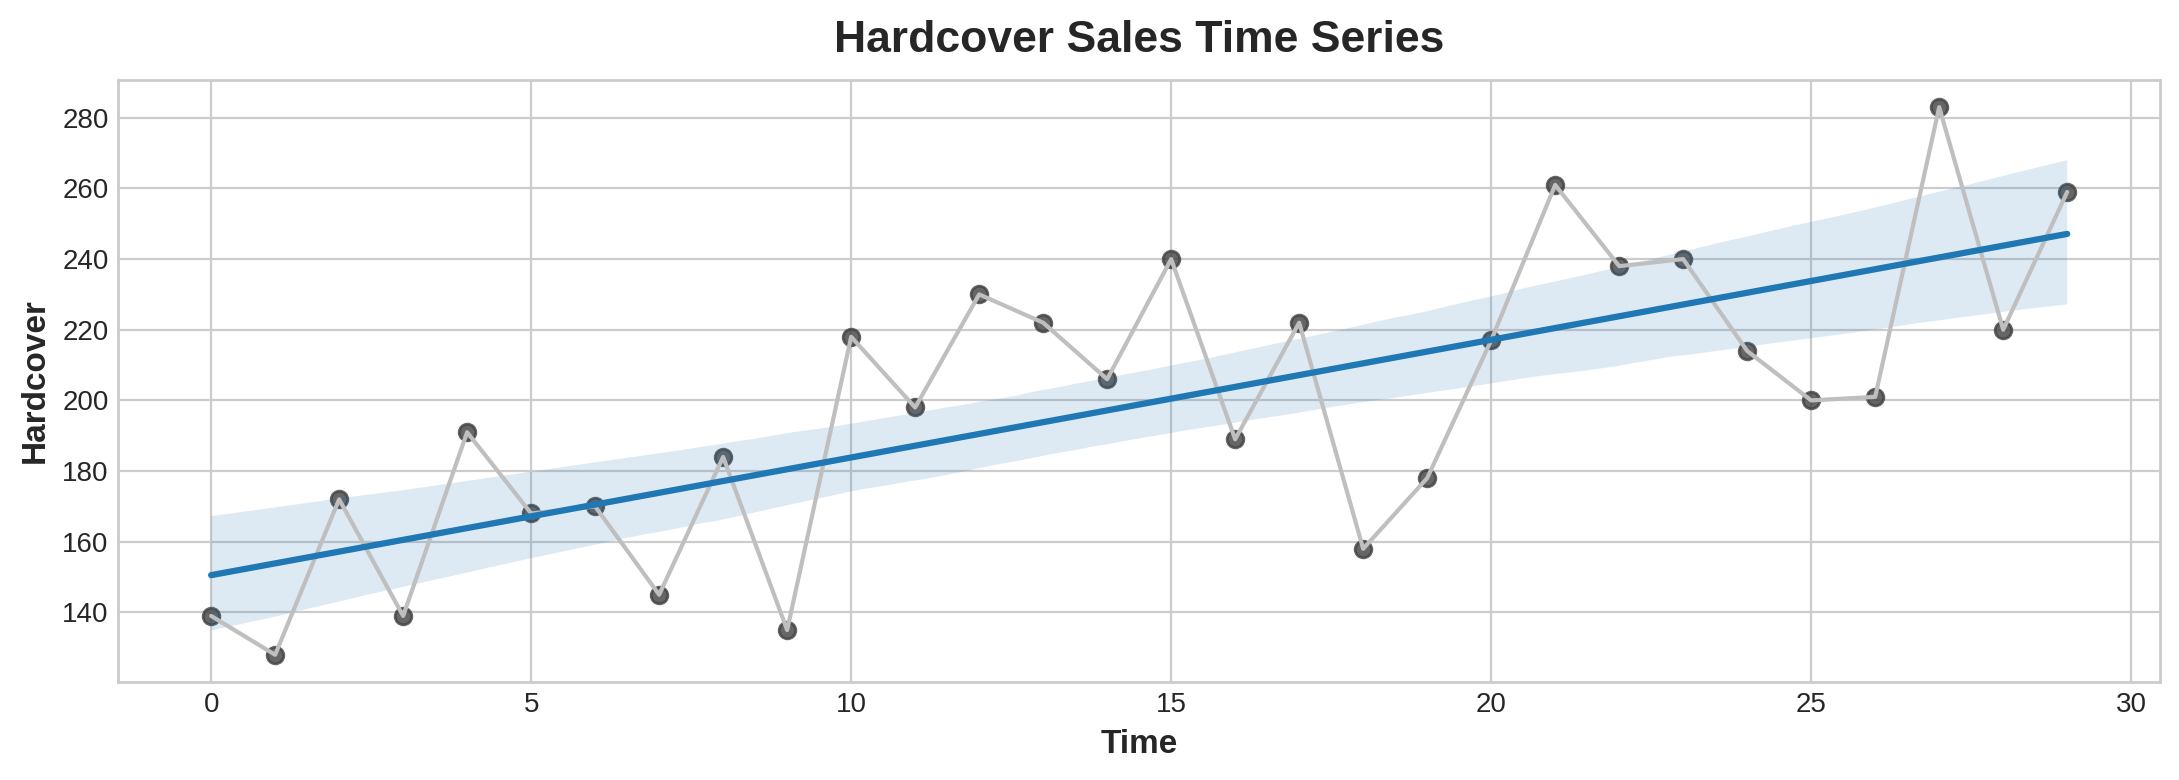

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout = True,
    figsize = (11, 4),
    titlesize = 18,
    titleweight = "bold"
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 16,
    titlepad = 10
)

%config InlineBackend.figure_format = "retina"

fig, ax = plt.subplots()
ax.plot("Time", "Hardcover", data=df, color="0.75")
ax = sns.regplot(x="Time", y="Hardcover", data=df, scatter_kws=dict(color="0.25"))
ax.set_title("Hardcover Sales Time Series")

### Lag features

In [ ]:
df["Lag_1"] = df["Hardcover"].shift(1)
df.head()

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


In [ ]:
df = df.reindex(columns=['Hardcover', 'Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

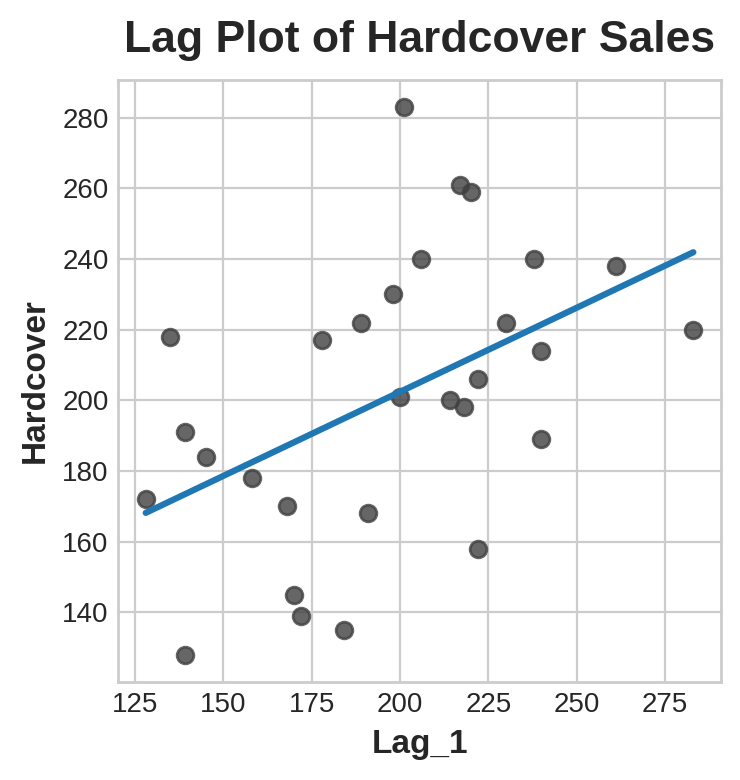

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x="Lag_1", y="Hardcover", data=df, ci=None,scatter_kws=dict(color="0.25"))
ax.set_aspect("equal")
ax.set_title("Lag Plot of Hardcover Sales")

## Example - Tunnel Traffic

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore") # ignore warnings to clean up output cells

# set matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [ ]:
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/Time Series Upskilling/Times series kaggle")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

tunnel = tunnel.set_index("Day")
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [ ]:
# by defualt, pandas create DatetimeIndex with dtype "timestamp" which represent specific point in time
# however, we have "day" index as period of 24 hours. hence, we are going to convert it to the PeriodIndex
# instead of DatetimeIndex

tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


### time-step feature

In [ ]:
df = tunnel.copy()

df["Time"] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [ ]:
from sklearn.linear_model import LinearRegression

# training data
X = df.loc[:, ["Time"]] # features
y = df.loc[:, "NumVehicles"] # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

In [ ]:
y[:5]

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
Freq: D, Name: NumVehicles, dtype: int64

In [ ]:
y_pred[:10]

Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
2003-11-06    98288.693592
2003-11-07    98311.191041
2003-11-08    98333.688491
2003-11-09    98356.185940
2003-11-10    98378.683390
Freq: D, dtype: float64

Text(0.5, 1.0, 'Tunnel Traffic Time Series')

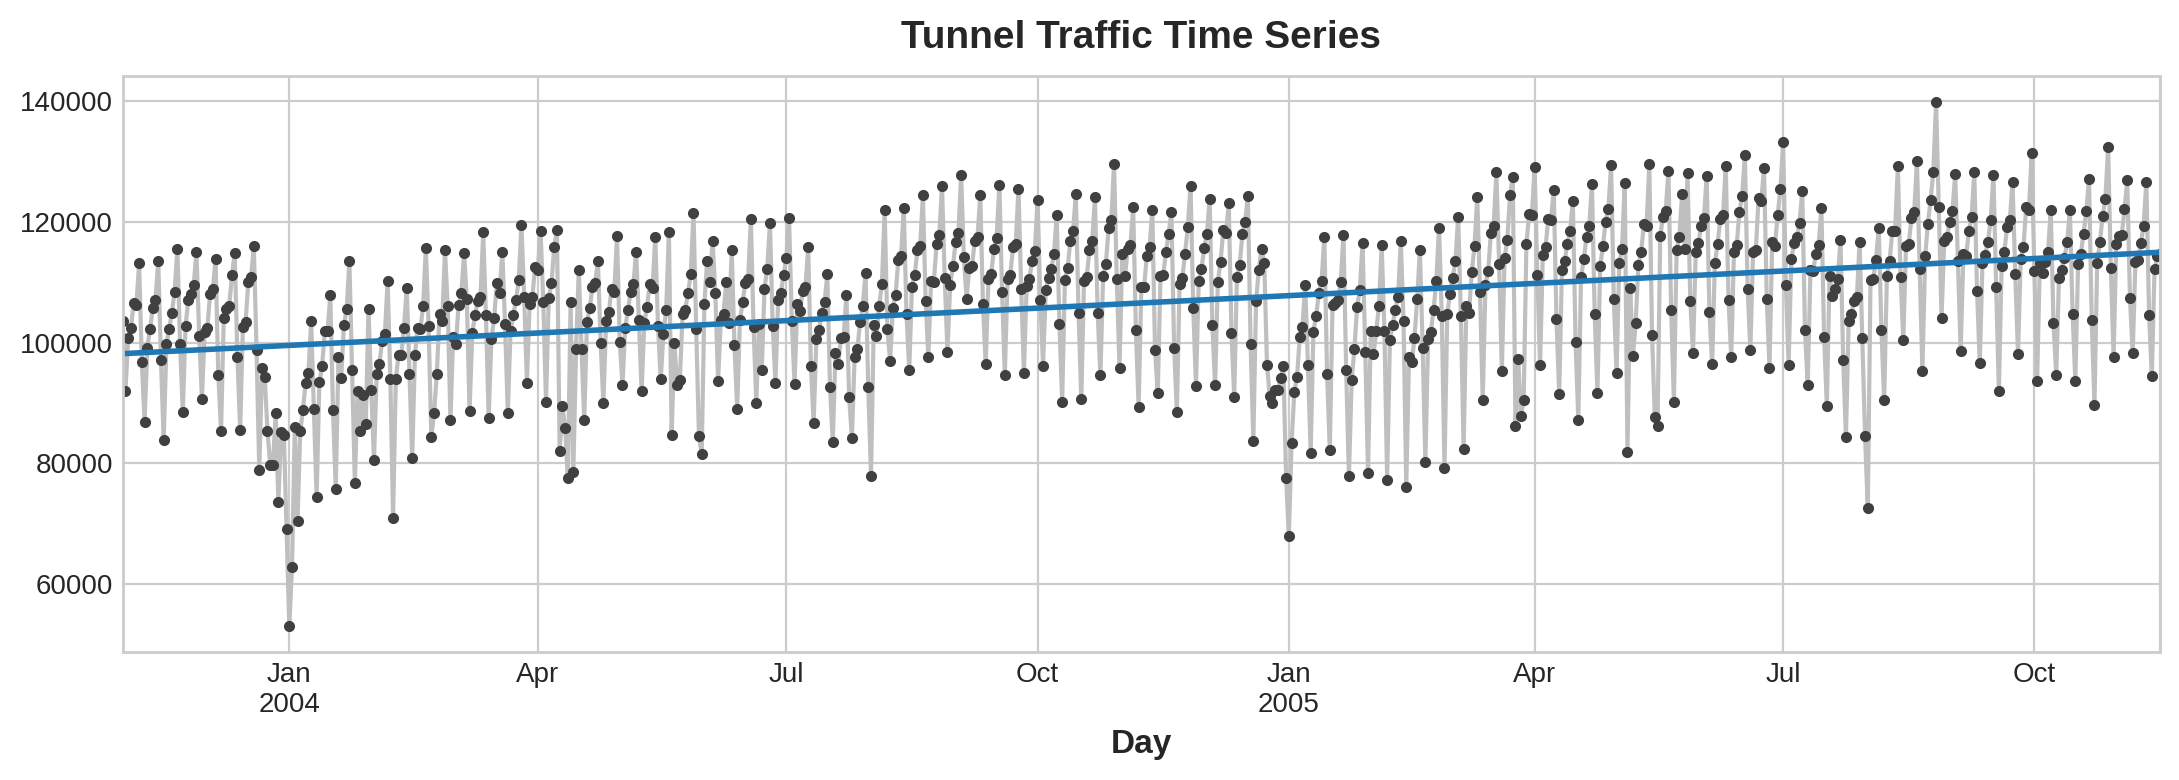

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=2)
ax.set_title("Tunnel Traffic Time Series")

### Lag feature

In [ ]:
df["Lag_1"] = df["NumVehicles"].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


When creating lag features, we need to decide what to do with the missing values produced. Filling them in is one option, maybe with 0.0 or "backfilling" with the first known value. Instead, we'll just drop the missing values, making sure to also drop values in the target from corresponding dates.



In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ["Lag_1"]]
X.dropna(inplace=True)

y = df.loc[:, "NumVehicles"]


In [ ]:
y, X = y.align(X, join="inner")

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
y[:5], y_pred[:5]

(Day
 2003-11-02     92051
 2003-11-03    100795
 2003-11-04    102352
 2003-11-05    106569
 2003-11-06    106284
 Freq: D, Name: NumVehicles, dtype: int64,
 Day
 2003-11-02    104961.799284
 2003-11-03     98840.684037
 2003-11-04    103500.939302
 2003-11-05    104330.767464
 2003-11-06    106578.285356
 Freq: D, dtype: float64)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

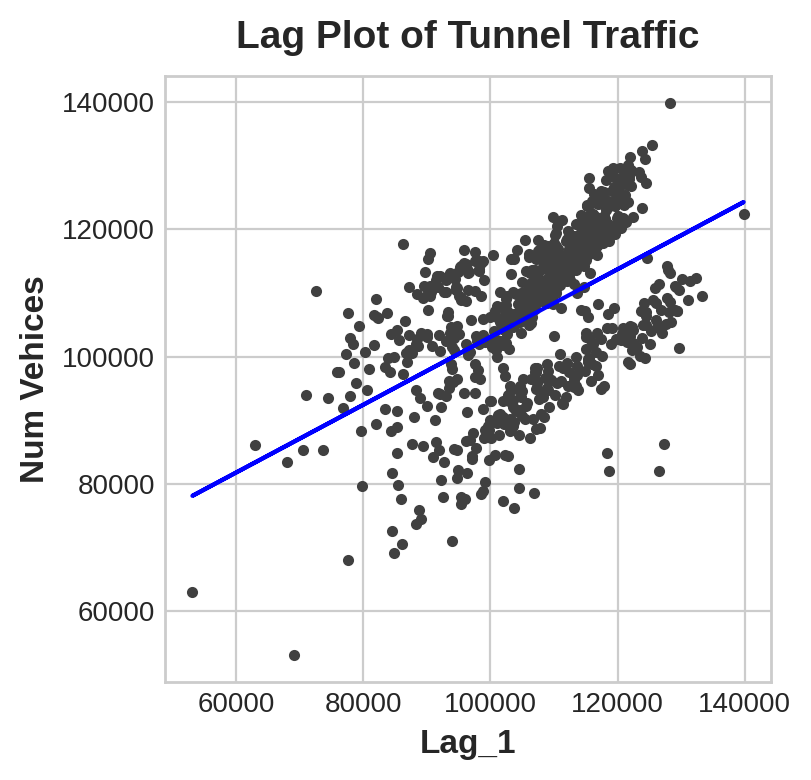

In [ ]:
fig, ax = plt.subplots()
ax.plot(X["Lag_1"], y, '.', color="0.25")
ax.plot(X["Lag_1"], y_pred, color="blue")
ax.set_aspect("equal")
ax.set_ylabel("Num Vehices")
ax.set_xlabel("Lag_1")
ax.set_title("Lag Plot of Tunnel Traffic")

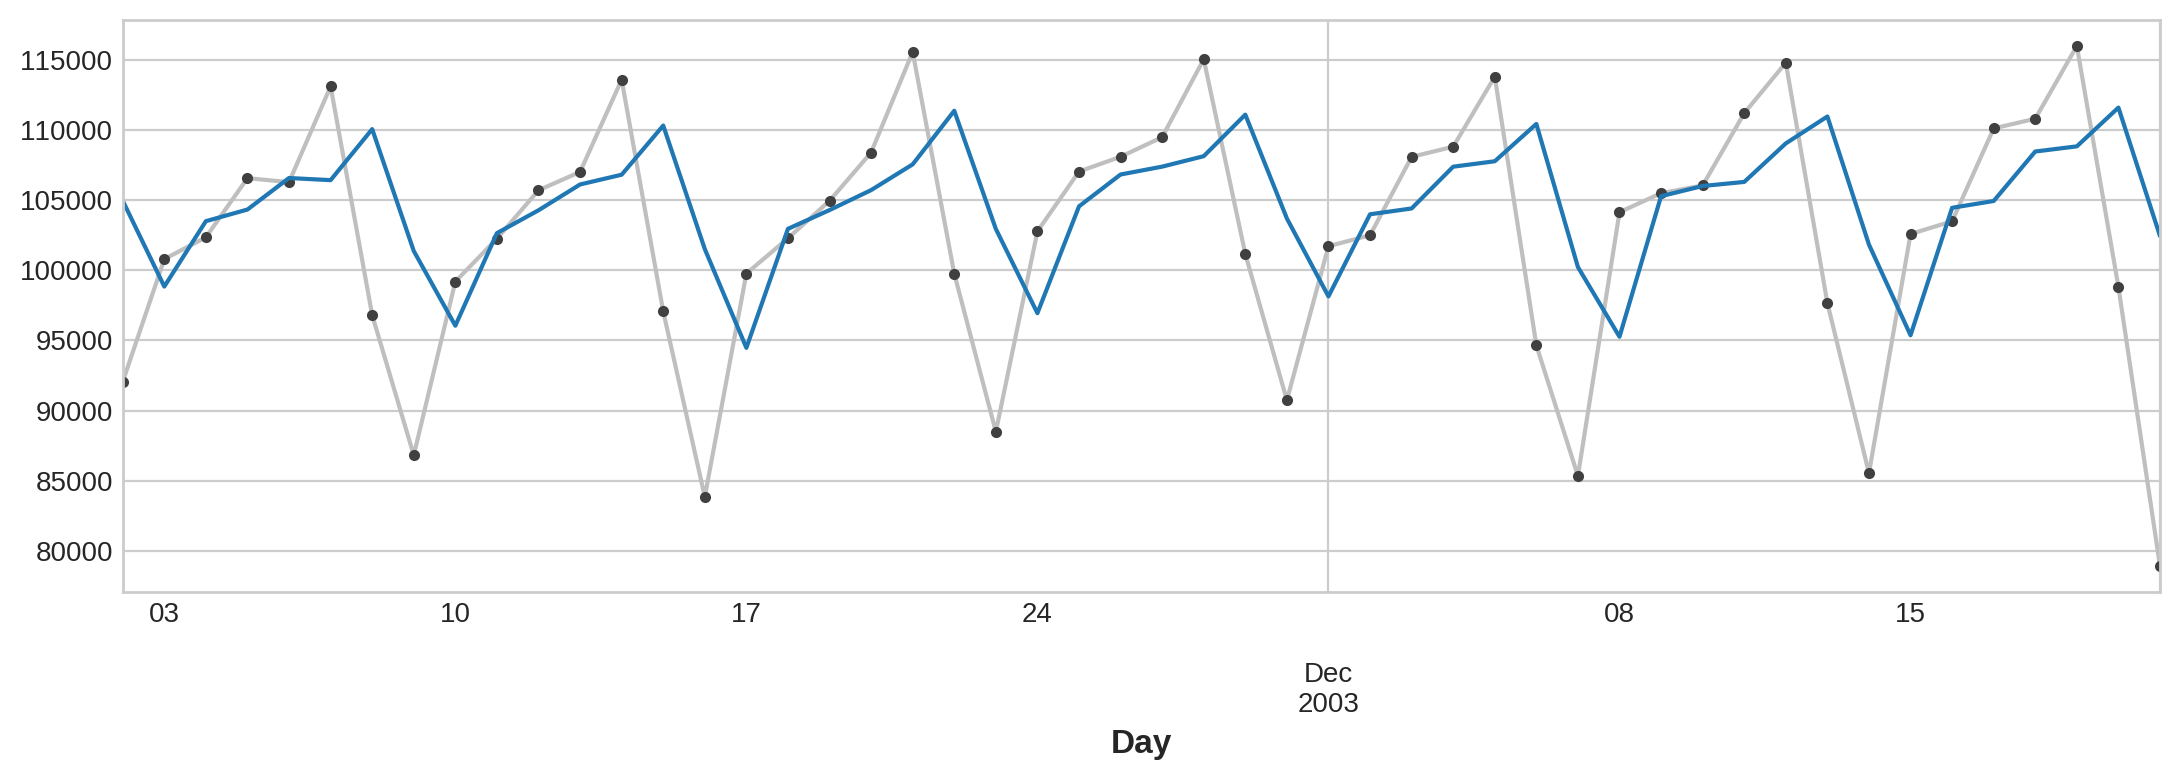

In [ ]:
ax = y[:50].plot(**plot_params)
ax = y_pred[:50].plot()

In [ ]:
y[:5]

Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
2003-11-06    106284
Freq: D, Name: NumVehicles, dtype: int64

In [ ]:
y_pred[:5]

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
Freq: D, dtype: float64